In [1]:
#data di LSTM
#sequential (1,2,1,3,4,1,5,2) data dijadikan type time lalu dipecah menggunakan Timesplit, contoh saham
#sequential -> regresi
#supervised (x,y) contoh ((3,1),(2,4)) displit menggunakan train test splitter
#supervised -> regresi, classifier

In [2]:
#siapin data dulu kayak di data processing

In [3]:
#membuat model LSTM
#model = Sequential(LSTM(2),Dense(1))
#atau menentukan banyak hidden layer & output
#model.add(LSTM(2, input_shape(2,1,0))) #ada 2 hidden layer & menentukan bentuk input dimensi
#model.add(Dense(1)) #tipe output
#menentukan fungsi aktivasi (fungsi yg mengolah input)
#model.Activation('linear')
#model.compile(optimizer='sgd',loss='mse')

#untuk mereshape data sesuai input shape
#data = data.reshape()

#fit data ke model
#model.fit(X_train,Y_train,batch_size=12,epoch=1000) #input, output

#evaluasi
#loss,accuracy=model.evaluate(X,Y)

#predict
#model.predict(X)

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model #fungsi kernel linear karena naik saham biasanya linear

In [3]:
#ilangin Na
df = pd.read_csv('MSFT.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-21,166.679993,168.190002,166.429993,166.500000,164.754654,29517200
2020-01-22,167.399994,167.490005,165.679993,165.699997,163.963043,24138800
2020-01-23,166.190002,166.800003,165.270004,166.720001,164.972351,19680800
2020-01-24,167.509995,167.529999,164.449997,165.039993,163.309952,24918100
2020-01-27,161.149994,163.380005,160.199997,162.279999,160.578888,32078100


In [6]:
df.shape

(252, 6)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,195.422659,198.024127,192.835992,195.519841,194.652521,3.790921e+07
std,22.482885,21.871446,22.797246,22.384795,22.755806,1.679454e+07
min,137.009995,140.570007,132.520004,135.419998,134.366470,1.055060e+07
25%,180.149998,182.747501,176.585003,180.064995,178.321652,2.672538e+07
50%,203.980003,205.635002,201.584999,203.445000,202.574264,3.294185e+07
75%,213.852505,215.579994,211.490001,213.862499,213.360154,4.391550e+07
max,229.270004,232.860001,227.350006,231.649994,231.045105,9.707360e+07


<AxesSubplot:xlabel='Date'>

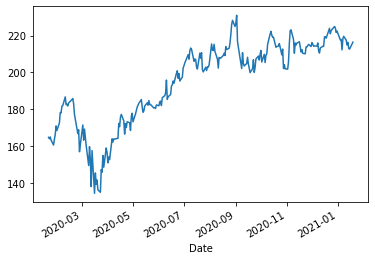

In [8]:
df['Adj Close'].plot()

In [9]:
X=df.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

In [10]:
X.head()

,Open,High,Low,Volume
Date,,,,
2020-01-21,166.679993,168.190002,166.429993,29517200
2020-01-22,167.399994,167.490005,165.679993,24138800
2020-01-23,166.190002,166.800003,165.270004,19680800
2020-01-24,167.509995,167.529999,164.449997,24918100
2020-01-27,161.149994,163.380005,160.199997,32078100


In [11]:
X.corrwith(df['Adj Close'])

Open      0.988889
High      0.993917
Low       0.994607
Volume   -0.649365
dtype: float64

<AxesSubplot:>

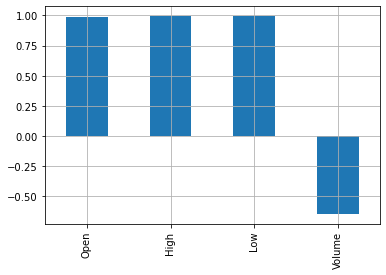

In [13]:
X.corrwith(df['Adj Close']).plot.bar(grid=True)

In [15]:
#pisahin input output
test = df
target_adj_close = pd.DataFrame(df['Adj Close'])
feature_columns = ['Open','High','Low','Volume'] #input

In [19]:
#normalisasi
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data,index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2020-01-21,0.321591,0.299274,0.357587,0.219209
2020-01-22,0.329395,0.291689,0.349678,0.157047
2020-01-23,0.316280,0.284213,0.345355,0.105523
2020-01-24,0.330587,0.292123,0.336708,0.166054
2020-01-27,0.261652,0.247156,0.291891,0.248807


In [20]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:90]

validation_x = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:90]

In [22]:
ts_split = TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
    X_train, X_test = feature_minmax_transform[:len(train_index)],feature_minmax_transform[len(train_index):]
    Y_train, Y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index):].values.ravel()

In [23]:
X_test.shape

(8, 4)

In [24]:
X_train.shape

(82, 4)

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
modelawal = dt.fit(X_train,Y_train)

In [30]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_ts_t = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [36]:
import keras.backend as K
from keras.callbacks import EarlyStopping #kalo uda konvergen berhenti
from keras.optimizers import Adam
from keras.models import load_model
from keras.models import Sequential

K.clear_session()
model = Sequential()
model.add(LSTM(16,input_shape=(1,X_train.shape[1]),activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
early_stop=EarlyStopping(monitor='loss',patience=5,verbose=1) #kalo ada 5 data yg loss nya semakin naik, maka akan berhenti

#fitting
history_model_lstm = model.fit(X_tr_t, Y_train,epochs=200,batch_size=8,verbose=1,shuffle=False,callbacks=[early_stop])


Epoch 1/200
11/11 [==============================] - 0s 14ms/step - loss: 28123.9844
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 28114.5859
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 28105.8516
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 28097.4941
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 28089.4336
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 28081.5039
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 28073.2871
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 28064.5234
Epoch 9/200
11/11 [==============================] - 0s 6ms/step - loss: 28055.0938
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 28044.8086
Epoch 11/200
11/11 [==============================] - 0s 4ms/step - loss: 28033.4902
Epoch 12/200
11/11 [==============================] - 0s 5ms/step - loss:

In [37]:
y_pred_test = model.predict(X_ts_t)

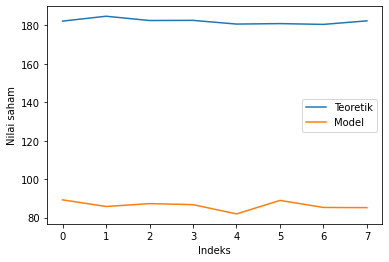

In [39]:
plt.plot(Y_test,label='Teoretik')
plt.plot(y_pred_test, label='Model')
plt.xlabel('Indeks')
plt.ylabel('Nilai saham')
plt.legend()
plt.show()